In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from __future__ import division
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [3]:
df = pd.read_csv('dataset/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
features = df.iloc[:,1:29].columns

<function matplotlib.pyplot.show>

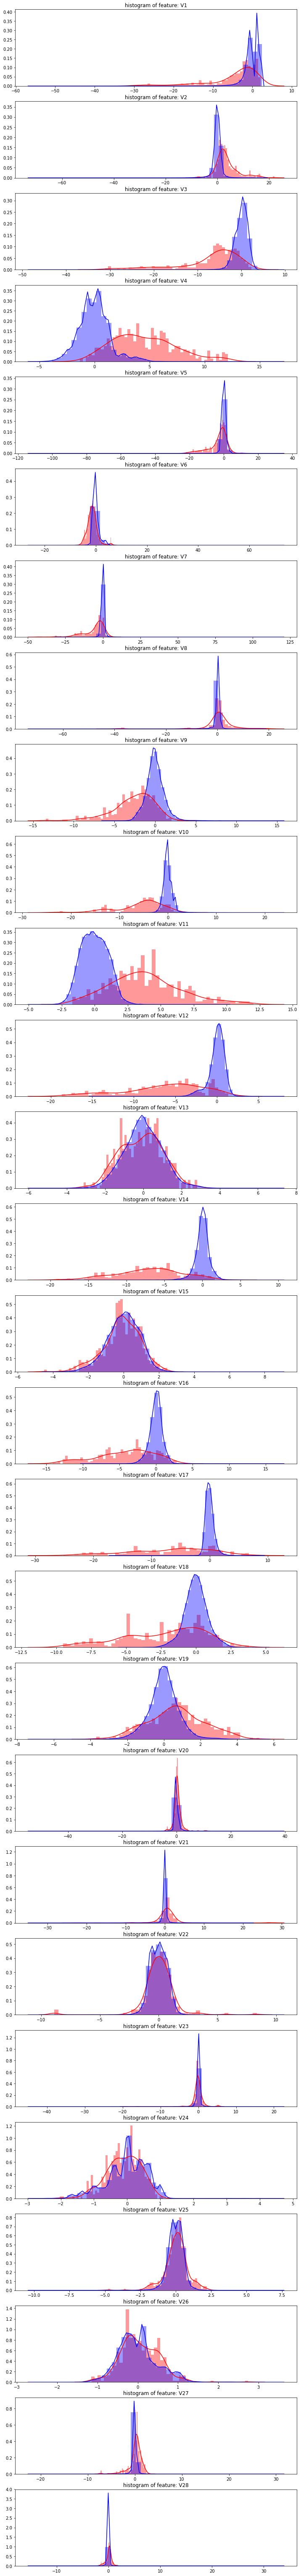

In [31]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    n = df[cn][df.Class == 1]
    f = df[cn][df.Class == 0]
    sns.distplot(n, bins=50, color='r')
    sns.distplot(f, bins=50, color='b')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show

In [6]:
#Drop all of the features that have very similar distributions between the two types of transactions.

df = df.drop(['V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'], axis =1)

In [7]:
count_normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
count_fraud_transacation = len(df[df["Class"]==1]) # fraud by 1
fraud_indices = np.array(df[df.Class==1].index)
normal_indices = np.array(df[df.Class==0].index)

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data

def undersample(normal_indices, fraud_indices, multiple): # multiple denote the normal data = multiple * fraud data
    normal_indices_undersample = np.array(np.random.choice(normal_indices,(multiple*count_fraud_transacation),replace=False))
    undersample_data = np.concatenate([fraud_indices, normal_indices_undersample])
    undersample_data = df.iloc[undersample_data,:]
    
#     print "the normal transacation proportion is :", len(undersample_data[undersample_data.Class==0])/len(undersample_data)
#     print "the fraud transacation proportion is :", len(undersample_data[undersample_data.Class==1])/len(undersample_data)
#     print "total number of record in resampled data is:",len(undersample_data)
    return(undersample_data)

In [8]:
def prediction_algorithms(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred = model.predict(features_test)
    cm = confusion_matrix(labels_test,pred)
    print "the recall for this model is :",cm[1,1] / (cm[1,1] + cm[1,0])
    print "The accuracy is :", (cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print "TP",cm[1,1] # no of fraud transaction which are predicted fraud
    print "TN",cm[0,0] # no. of normal transaction which are predited normal
    print "FP",cm[0,1] # no of normal transaction which are predicted fraud
    print "FN",cm[1,0] # no of fraud Transaction which are predicted normal
    sns.heatmap(cm, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "Classification Report:" 
    print(classification_report(labels_test,pred))

#### Test all the algorithms on the undersample and whole dataset
* Logistic Regression
* Non-linear Support Vector Machine
* Random Forest
* Gradient Boosting Decision Tree
***

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9411764705882353
The accuracy is : 0.959349593495935
TP 112
TN 124
FP 3
FN 7


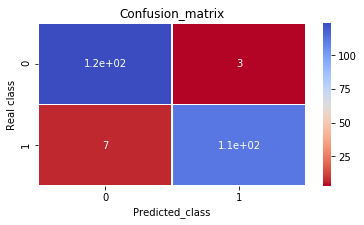

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       127
          1       0.97      0.94      0.96       119

avg / total       0.96      0.96      0.96       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.8125
The accuracy is : 0.9322493224932249
TP 104
TN 240
FP 1
FN 24


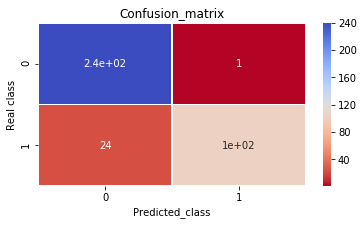

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       241
          1       0.99      0.81      0.89       128

avg / total       0.94      0.93      0.93       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8
The accuracy is : 0.9471544715447154
TP 104
TN 362
FP 0
FN 26


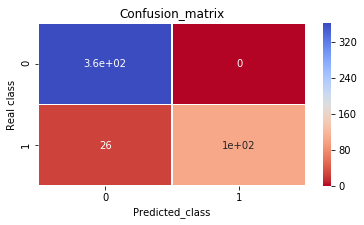

Classification Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.97       362
          1       1.00      0.80      0.89       130

avg / total       0.95      0.95      0.95       492

________________________________________________________________________________________________________



In [32]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    lr = LogisticRegression(random_state=0)
    prediction_algorithms(lr, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9416666666666667
The accuracy is : 0.9567146990253083
TP 113
TN 68007
FP 3075
FN 7


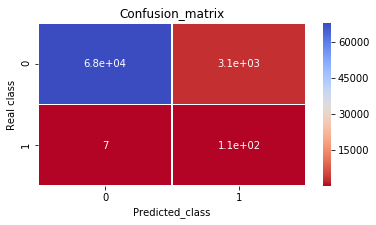

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     71082
          1       0.04      0.94      0.07       120

avg / total       1.00      0.96      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.7916666666666666
The accuracy is : 0.9940732001910059
TP 95
TN 70685
FP 397
FN 25


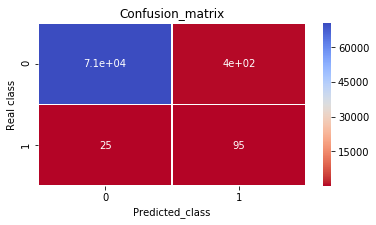

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.19      0.79      0.31       120

avg / total       1.00      0.99      1.00     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8083333333333333
The accuracy is : 0.994143422937558
TP 97
TN 70688
FP 394
FN 23


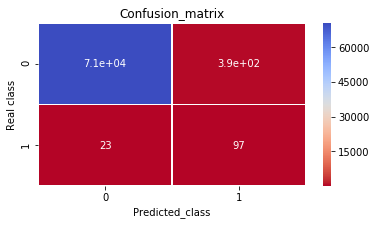

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.20      0.81      0.32       120

avg / total       1.00      0.99      1.00     71202

________________________________________________________________________________________________________



In [33]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    lr = LogisticRegression(random_state=0)
    prediction_algorithms(lr, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.14285714285714285
The accuracy is : 0.5853658536585366
TP 17
TN 127
FP 0
FN 102


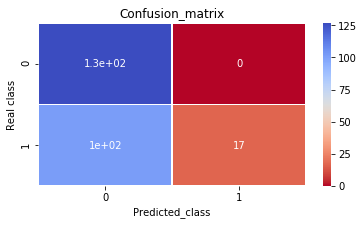

Classification Report:
             precision    recall  f1-score   support

          0       0.55      1.00      0.71       127
          1       1.00      0.14      0.25       119

avg / total       0.77      0.59      0.49       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.0625
The accuracy is : 0.6747967479674797
TP 8
TN 241
FP 0
FN 120


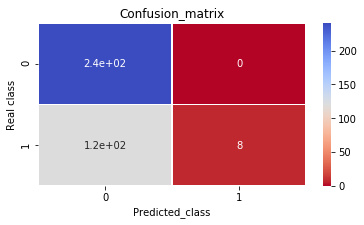

Classification Report:
             precision    recall  f1-score   support

          0       0.67      1.00      0.80       241
          1       1.00      0.06      0.12       128

avg / total       0.78      0.67      0.56       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.06153846153846154
The accuracy is : 0.7520325203252033
TP 8
TN 362
FP 0
FN 122


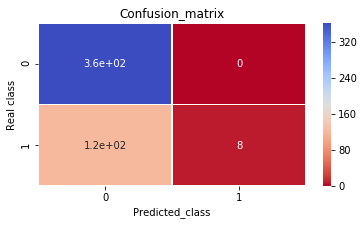

Classification Report:
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       362
          1       1.00      0.06      0.12       130

avg / total       0.81      0.75      0.66       492

________________________________________________________________________________________________________



In [34]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    svm = SVC(random_state=0)
    prediction_algorithms(svm, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.7583333333333333
The accuracy is : 0.9976264711665402
TP 91
TN 70942
FP 140
FN 29


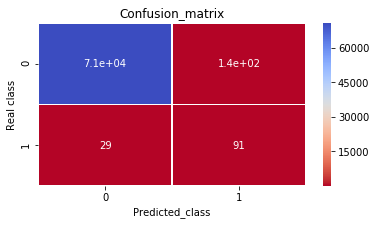

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.39      0.76      0.52       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.7416666666666667
The accuracy is : 0.9995646189713772
TP 89
TN 71082
FP 0
FN 31


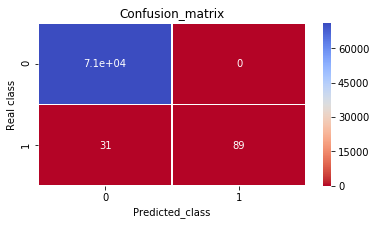

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.74      0.85       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.6833333333333333
The accuracy is : 0.9994663071262043
TP 82
TN 71082
FP 0
FN 38


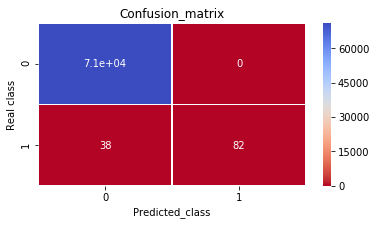

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.68      0.81       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [35]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    svm = SVC(random_state=0)
    prediction_algorithms(svm, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9411764705882353
The accuracy is : 0.9390243902439024
TP 112
TN 119
FP 8
FN 7


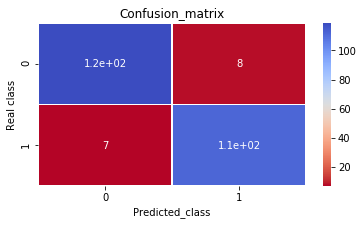

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.94      0.94       127
          1       0.93      0.94      0.94       119

avg / total       0.94      0.94      0.94       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.875
The accuracy is : 0.948509485094851
TP 112
TN 238
FP 3
FN 16


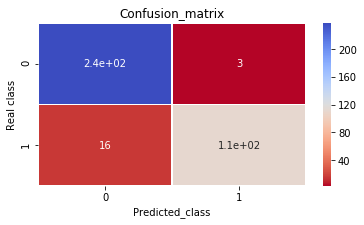

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.96       241
          1       0.97      0.88      0.92       128

avg / total       0.95      0.95      0.95       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8538461538461538
The accuracy is : 0.9613821138211383
TP 111
TN 362
FP 0
FN 19


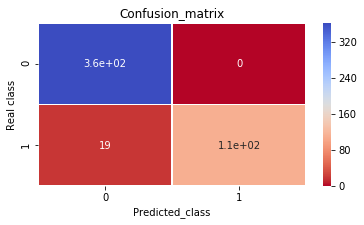

Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       362
          1       1.00      0.85      0.92       130

avg / total       0.96      0.96      0.96       492

________________________________________________________________________________________________________



In [39]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    prediction_algorithms(rf, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion

the model classification for 1 proportion
the recall for this model is : 0.975
The accuracy is : 0.96800651667088
TP 117
TN 68807
FP 2275
FN 3


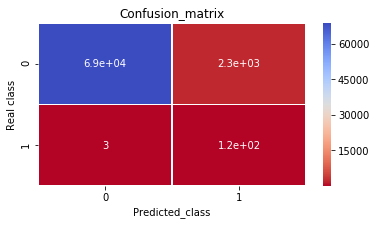

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     71082
          1       0.05      0.97      0.09       120

avg / total       1.00      0.97      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion

the model classification for 2 proportion
the recall for this model is : 0.95
The accuracy is : 0.9918541613999606
TP 114
TN 70508
FP 574
FN 6


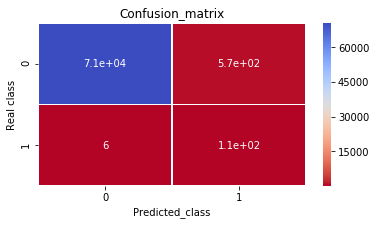

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.17      0.95      0.28       120

avg / total       1.00      0.99      0.99     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion

the model classification for 3 proportion
the recall for this model is : 0.9583333333333334
The accuracy is : 0.9933850172747957
TP 115
TN 70616
FP 466
FN 5


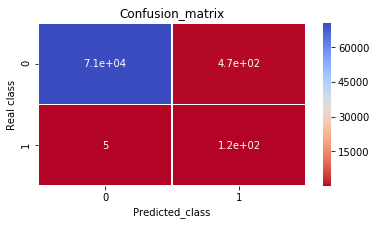

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.20      0.96      0.33       120

avg / total       1.00      0.99      1.00     71202

________________________________________________________________________________________________________



In [28]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    prediction_algorithms(rf, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9411764705882353
The accuracy is : 0.9349593495934959
TP 112
TN 118
FP 9
FN 7


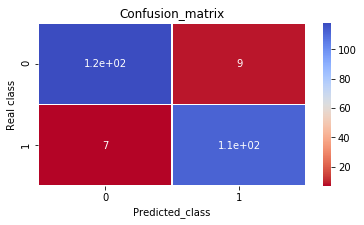

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.93      0.94       127
          1       0.93      0.94      0.93       119

avg / total       0.94      0.93      0.93       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.890625
The accuracy is : 0.94579945799458
TP 114
TN 235
FP 6
FN 14


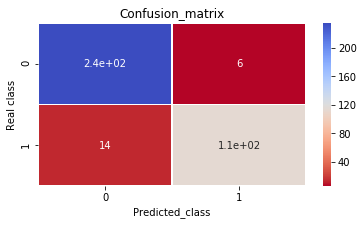

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       241
          1       0.95      0.89      0.92       128

avg / total       0.95      0.95      0.95       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8846153846153846
The accuracy is : 0.959349593495935
TP 115
TN 357
FP 5
FN 15


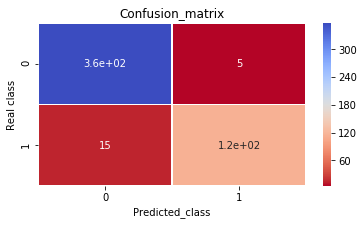

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       362
          1       0.96      0.88      0.92       130

avg / total       0.96      0.96      0.96       492

________________________________________________________________________________________________________



In [43]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    gbt = GradientBoostingClassifier(random_state=0)
    prediction_algorithms(gbt, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.975
The accuracy is : 0.9649588494705205
TP 117
TN 68590
FP 2492
FN 3


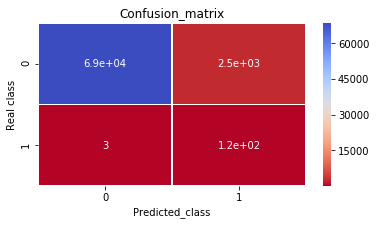

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     71082
          1       0.04      0.97      0.09       120

avg / total       1.00      0.96      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.9583333333333334
The accuracy is : 0.9819527541361198
TP 115
TN 69802
FP 1280
FN 5


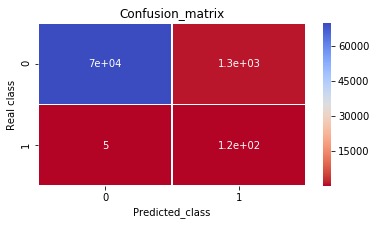

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     71082
          1       0.08      0.96      0.15       120

avg / total       1.00      0.98      0.99     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.9416666666666667
The accuracy is : 0.9908289093003005
TP 113
TN 70436
FP 646
FN 7


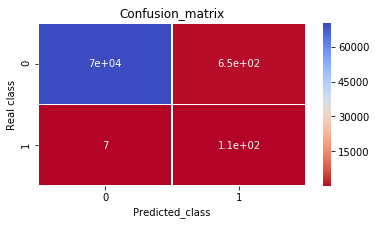

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.15      0.94      0.26       120

avg / total       1.00      0.99      0.99     71202

________________________________________________________________________________________________________



In [45]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    gbt = GradientBoostingClassifier(random_state=0)
    prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

***
* The results are good when the algorithms are tested on the undersampled dataset. However, when the data is tested on the whole dataset, the precision is very low. Which means a lot of "innocent" normal transactions are classified as fraud by mistake.

* So far, the results shows that as proportion increases, recall rate decreases and precision increases. Since low precision would cause damage to banks, low recall rate would cause damage to customers. A trade-off between precision and recall rate need to be acheived. A function is defined named "custom_loss_fuction" to measure the economic effect of classfication using the average number of transactions' amounts. This function could be help to find the optimal proportion of undersampling.
***

In [18]:
def custom_loss_fuction(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred = model.predict(features_test)
    cm = confusion_matrix(labels_test,pred)
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    loss = (1 - precision) * 88.29 + (1 - recall) * 122.12
    return loss

### Logistic Regression

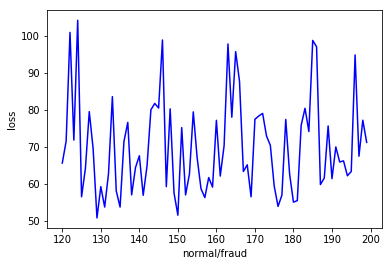

optimal proportion of normal/fraud is :  129
min loss is :  50.7505

the model classification for 129 proportion
the recall for this model is : 0.7166666666666667
The accuracy is : 0.9988904806044774
TP 86
TN 71037
FP 45
FN 34


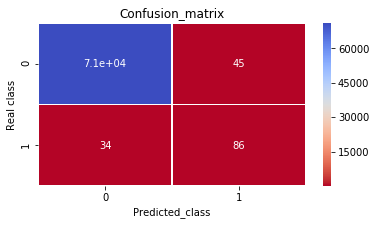

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.66      0.72      0.69       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [22]:
proportion = []
loss = []
for i in range(120,200):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    lr = LogisticRegression(random_state=0)
    loss.append(custom_loss_fuction(lr, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LogisticRegression(random_state=0)
prediction_algorithms(lr, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

### Vector Support Machine

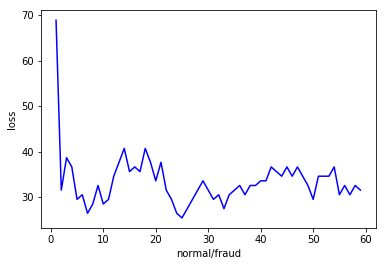

optimal proportion of normal/fraud is :  25
min loss is :  25.441666666666674

the model classification for 25 proportion
the recall for this model is : 0.7833333333333333
The accuracy is : 0.9996348417179293
TP 94
TN 71082
FP 0
FN 26


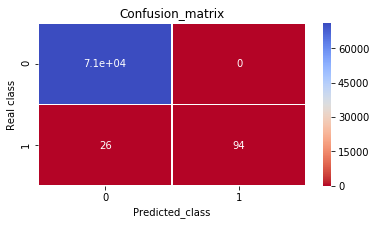

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.78      0.88       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [37]:
proportion = []
loss = []
for i in range(1, 60):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    svm = SVC(random_state = 0)
    loss.append(custom_loss_fuction(svm, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
svm = SVC(random_state=0)
prediction_algorithms(svm, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

* Since non-linear SVM is a black box classifier for which we do not know the mapping function Φ explicitly. There will be not any further pre-processing on SVM. The benchmark reaches the optimal precision and recall at exactlly the same proportion(=25) as the one after feature engineering. 
* To simplify the calculation, the columns after feature engineering will be used for model selection of SVM later.
***

### Random Forest

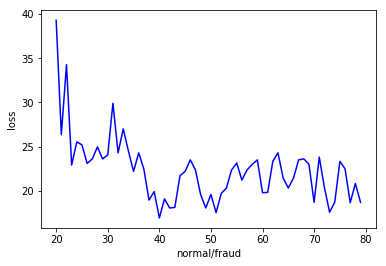

optimal proportion of normal/fraud is :  40
min loss is :  16.9575868544601

the model classification for 40 proportion
the recall for this model is : 0.9833333333333333
The accuracy is : 0.9995786635206876
TP 118
TN 71054
FP 28
FN 2


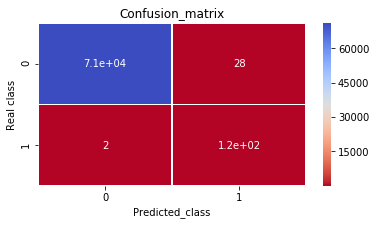

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.81      0.98      0.89       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [30]:
proportion = []
loss = []
for i in range(20,80):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    loss.append(custom_loss_fuction(rf, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
rf = RandomForestClassifier(n_estimators=100, random_state=0)
prediction_algorithms(rf, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

### Gradient Boosting Decision Tree

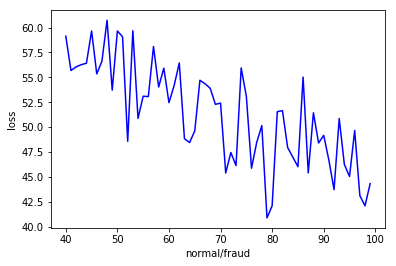

optimal proportion of normal/fraud is :  79
min loss is :  40.87807490636705
the undersample data for 79 proportion

the model classification for 79 proportion
the recall for this model is : 0.9083333333333333
The accuracy is : 0.9985393668717171
TP 109
TN 70989
FP 93
FN 11


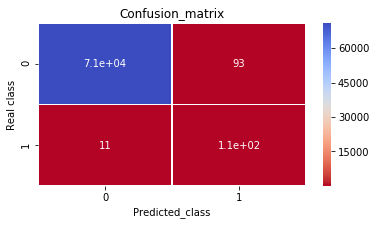

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.54      0.91      0.68       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [36]:
proportion = []
loss = []
for i in range(40,100):
    undersample_data = undersample(normal_indices,fraud_indices,i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    gbt = GradientBoostingClassifier(random_state=0)
    loss.append(custom_loss_fuction(gbt, X_undersample_train, X_test, y_undersample_train, y_test))
    proportion.append(i)
plt.plot(proportion, loss, '-b')
plt.ylabel('loss')
plt.xlabel('normal/fraud')
plt.show()

min_loss = np.min(loss)
min_loss_index = loss.index(min_loss)
optimal_proportion = proportion[min_loss_index]
print "optimal proportion of normal/fraud is : ", optimal_proportion
print "min loss is : ", min_loss
print "the undersample data for {} proportion".format(optimal_proportion)
undersample_data = undersample(normal_indices,fraud_indices,optimal_proportion)
print ""
print "the model classification for {} proportion".format(optimal_proportion)
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
gbt = GradientBoostingClassifier(random_state=0)
prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

***
The above metrics show the result of our feature engineering in optimal proportion of normal/fraud. The performance is measured by "custom_loss_fuction" which returns a number defined manually istead of using cross validation score. 
In real life, classifying fraud as normal and classifying normal as fraud may have different weights of effect because of the customers' satisfactory, bank's reputation or something. It is not necessarily decided by the average amount of normal transactions or fraud transactions. Sometimes classfying normal as fraud may have a greater effect because in this way the bank is actually annoying the busniess partners instead of individuals. Thus, penalties could be added before the coeficients of (1-recall) and (1-precision). By doing this, the weight of recall and precision in deciding model's performance will be changed.
***